In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [43]:
image = cv2.imread('image_q1.jpg')
resized = cv2.resize(image, (400, 400), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Gray Scale Image')

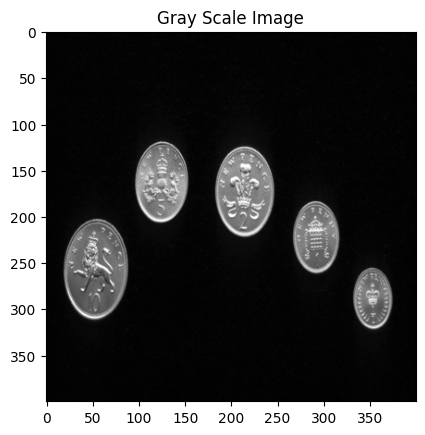

In [44]:
plt.imshow(gray, cmap='gray')
plt.title('Gray Scale Image')

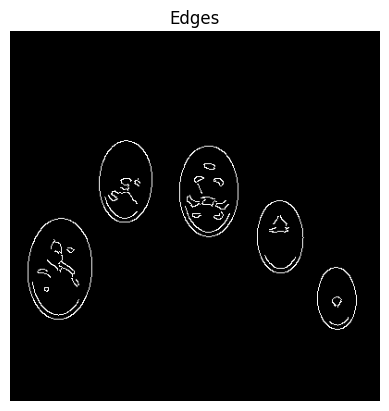

In [45]:
blur = cv2.GaussianBlur(gray, (9,9), 0)
canny = cv2.Canny(blur, 80, 150)
plt.title('Edges')
plt.axis('off')
plt.imshow(canny, cmap='gray')

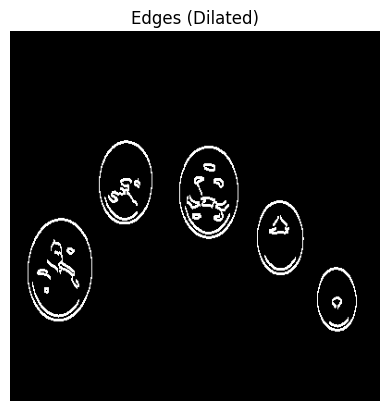

In [46]:
dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.title('Edges (Dilated)')
plt.axis('off')
plt.imshow(dilated, cmap='gray')

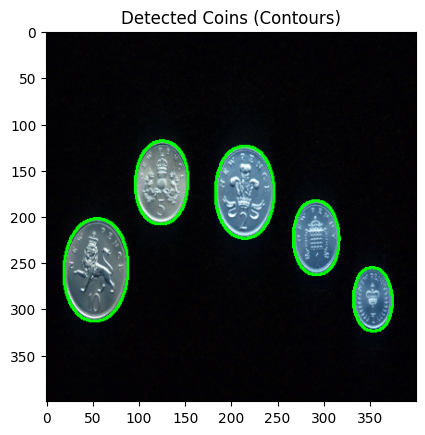

In [47]:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour_img = resized.copy()
cv2.drawContours(contour_img, cnt, -1, (0,255,0), 2)
plt.title('Detected Coins (Contours)')
plt.imshow(contour_img)

In [48]:
from skimage import measure
from skimage import color

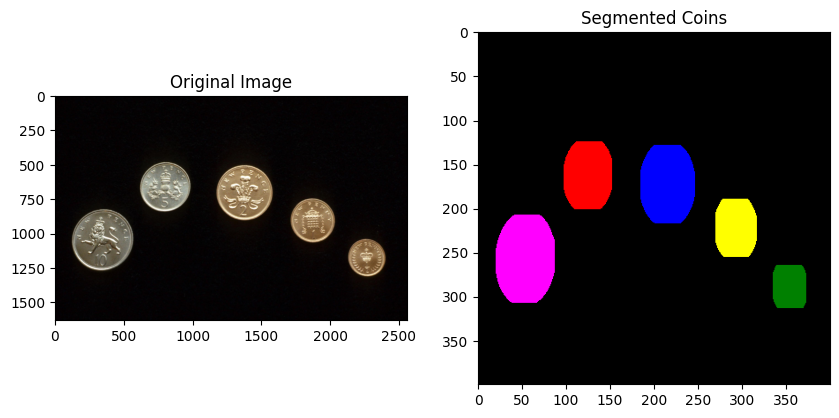

In [49]:

_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((15, 15), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

labels = measure.label(cleaned, connectivity=2)
colored_labels = color.label2rgb(labels, bg_label=0)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Segmented Coins")
plt.imshow(colored_labels)
plt.show()

In [50]:
num_coins = len(np.unique(labels)) - 1
print(f"Number of coins detected: {num_coins}")

Number of coins detected: 5
